## Imports

In [1]:
# Data manipulation
import time
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

# KERAS
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Fine-Tune your Neural Network and Save it

🎯 **Goals of this challenge**

1. ⚙️ **Fine-tune the optimizer** of a Neural Network
2. 💾 **Save**/**Load** a trained Neural Network

👩🏻‍🏫 Now that you have solid foundations about what Neural Networks are, how to design their architecture, and how to prevent them from overfitting, let's take a closer look at the `.compile(loss = ?, metrics = ?, activation = ?)` part.

## (0) The Boston Housing Dataset

📚 `Tensorflow.Keras` has several built-in datasets that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

🏠 Out of those, we are going to use the **Boston Housing Dataset**.

Our mission is to **predict the values of the houses in USD (thousands)**, and we will measure the performance of our models using the _Mean Absolute Error (MAE)_ metric.

### (0.1) Loading the Dataset

In [2]:
# Loading the dataset:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [3]:
# Shape of the dataset: 
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

### (0.2) Quick Glance at the Target

<AxesSubplot:ylabel='Count'>

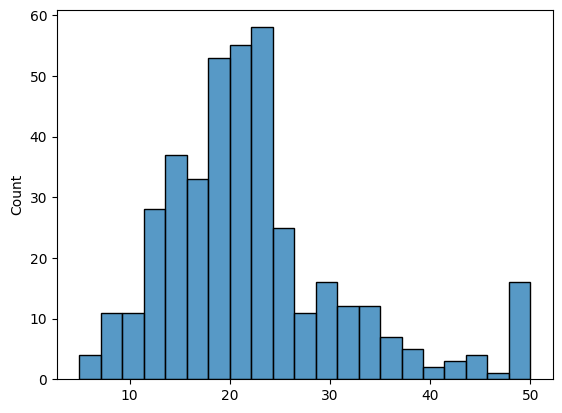

In [4]:
# Distribution of the houses' prices in the training set
sns.histplot(y_train)

<AxesSubplot:>

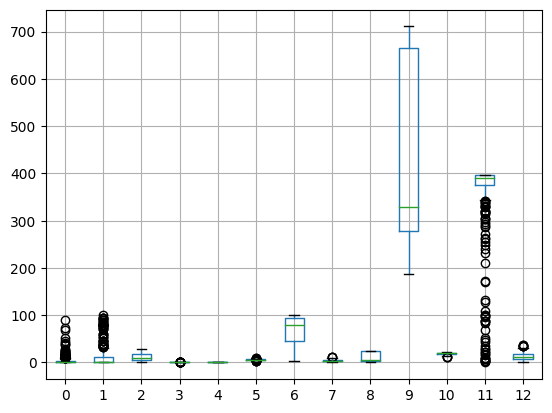

In [11]:
pd.DataFrame(X_train).boxplot()

In [5]:
# Null values and types of each feature:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [6]:
# Statistics about the numerical columns
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### (0.3) Minimal Data Preprocessing

👉 Here, we don't have any duplicates or missing values. Let's do the bare minimum of data preprocessing, i.e. ***scaling**, and move on quickly to the modeling phase.

#### ❓Scaling your Features

Standardize `X_train` and `X_test`.

In [12]:
# YOUR CODE HERE
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### (0.4) Baseline Model

🧑🏻‍🏫 In a regression task, the baseline model **always predicts the average value of `y_train`**

<details>
    <summary>Really?</summary>
    
- 🐒  Yes, in most cases!
- ❗️  Be aware that this is not the only possible way of building a baseline model
- 💹  In Time Series, the baseline model predicts the **last seen value**

#### ❓Question: what would be the performance of the baseline model here?

Before running any Machine Learning algorithm or advanced Deep Learning Neural Networks, it would be great to establish a benchmark score that you are supposed to beat. Otherwise, what is the point of running a fancy algorithm if you cannot beat this benchmark score on the testing set (other than showing off)?

Compute the Mean Absolute Error on the testing set using a "dumb" prediction of the mean value of `y_train`, computed on the training set.

In [27]:
# YOUR CODE HERE
mean_absolute_error_test_baseline = np.mean(np.abs(y_train-np.mean(y_train)))

## (1) The Neural Network

### ❓Initializing a Neural Network with a Specific Architecture

Write a function called `initialize_model` that generates a Neural Network with 3 layers:
- Input layer: **10 neurons**, `relu` activation function, and the appropriate input dimension
- Hidden layer: **7 neurons** and the `relu` activation function
- Predictive layer: an appropriate layer corresponding to the problem we are trying to solve

In [41]:
def initialize_model():
    model = models.Sequential()
    
    model.add(layers.Dense(10,activation='relu',input_dim=X_train_scaled.shape[1]))
    model.add(layers.Dense(7,activation='relu'))
    model.add(layers.Dense(1,activation='linear'))

    
    return model

#### ❓Number of Parameters

How many parameters do we have in this model? 
1. Compute this number yourself
2. Double-check your answer with `model.summary()`

We already covered the question about the number of parameters in a fully connected/dense network during **Deep Learning > 01. Fundamentals of Deep Learning** but it is always good to make sure you master the foundations of a new discipline 😉

In [22]:
model = initialize_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                140       
                                                                 
 dense_4 (Dense)             (None, 7)                 77        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


##### 💡Answer

<details>
    <summary>Click here</summary>

- Each house has `X_train.shape[-1]` = 13 features
- Remember that a neuron is a linear regression combined with an activation function, so we will have 13 weights and 1 bias

1. First layer: **10 neurons** $\times$ (13 weights + 1 bias ) = 140 params
2. Second layer: **7 neurons** $\times$ (10 weights + 1 bias ) = 77 params
3. Third layer: **1 neuron** $\times$ (7 weights + 1 bias) = 8 params
</details>

## (2) The Optimizer

### ❓Compiling Method

Write a function that:
1. takes _both_ a **model** and an **optimizer** as arguments
2. **compiles** the model
3. returns the compiled model

Please select wisely:
- the **Loss Function** to be optimized
- the **metrics** on which the model should be evaluated

In [24]:
def compile_model(model, optimizer_name):
    model.compile(optimizer=optimizer_name,loss='mean_absolute_error',metrics='accuracy')
    return model

### ❓Evaluating the Model

- Initialize the model and compile it with the `adam` optimizer
- Fit it on the training data
- Evaluate your model on the testing data

Don't forget to use an Early Stopping criterion to avoid overfitting!

<details>
    <summary>Notes</summary>

As we saw in the **"How to prevent overfitting"** challenge,  you could also use L2 penalties and Dropout Layers to prevent overfitting but:
- Early Stopping is the easiest and quickest code to implement, you just declare `es = EarlyStopping()` and call it back in the `.fit()` step
- The main goal of this challenge is to understand the **impact of the optimizer**, so stay focused 😉
</details>

In [44]:
def initialize_model():
    model = models.Sequential()
    
    model.add(layers.Dense(10,activation='relu',input_dim=X_train_scaled.shape[1]))
    model.add(layers.Dense(7,activation='relu'))
    model.add(layers.Dense(1,activation='linear'))

    
    return model

In [58]:
def compile_model(model, optimizer_name):
    model.compile(optimizer=optimizer_name,loss='mae',metrics='mae')
    return model

In [69]:
# YOUR CODE HERE
es = EarlyStopping()
model = initialize_model()
model = compile_model(model,optimizer_name='adam')
history=model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.33,batch_size=16)#,callbacks=[es])

Epoch 1/500
17/17 [==============================] - 1s 4ms/step - loss: 21.6312 - mae: 21.6312 - val_loss: 23.0636 - val_mae: 23.0636
Epoch 2/500
17/17 [==============================] - 0s 1ms/step - loss: 21.4364 - mae: 21.4364 - val_loss: 22.8483 - val_mae: 22.8483
Epoch 3/500
17/17 [==============================] - 0s 1ms/step - loss: 21.1989 - mae: 21.1989 - val_loss: 22.5796 - val_mae: 22.5796
Epoch 4/500
17/17 [==============================] - 0s 1ms/step - loss: 20.8911 - mae: 20.8911 - val_loss: 22.2256 - val_mae: 22.2256
Epoch 5/500
17/17 [==============================] - 0s 1ms/step - loss: 20.4821 - mae: 20.4821 - val_loss: 21.7669 - val_mae: 21.7669
Epoch 6/500
17/17 [==============================] - 0s 1ms/step - loss: 19.9551 - mae: 19.9551 - val_loss: 21.1840 - val_mae: 21.1840
Epoch 7/500
17/17 [==============================] - 0s 1ms/step - loss: 19.2858 - mae: 19.2858 - val_loss: 20.4313 - val_mae: 20.4313
Epoch 8/500
17/17 [==============================] - 0s

Epoch 63/500
17/17 [==============================] - 0s 1ms/step - loss: 2.8247 - mae: 2.8247 - val_loss: 3.9586 - val_mae: 3.9586
Epoch 64/500
17/17 [==============================] - 0s 1ms/step - loss: 2.8046 - mae: 2.8046 - val_loss: 3.9483 - val_mae: 3.9483
Epoch 65/500
17/17 [==============================] - 0s 1ms/step - loss: 2.8078 - mae: 2.8078 - val_loss: 3.8893 - val_mae: 3.8893
Epoch 66/500
17/17 [==============================] - 0s 1ms/step - loss: 2.7716 - mae: 2.7716 - val_loss: 3.8731 - val_mae: 3.8731
Epoch 67/500
17/17 [==============================] - 0s 1ms/step - loss: 2.7535 - mae: 2.7535 - val_loss: 3.8448 - val_mae: 3.8448
Epoch 68/500
17/17 [==============================] - 0s 1ms/step - loss: 2.7374 - mae: 2.7374 - val_loss: 3.8354 - val_mae: 3.8354
Epoch 69/500
17/17 [==============================] - 0s 1ms/step - loss: 2.7201 - mae: 2.7201 - val_loss: 3.8041 - val_mae: 3.8041
Epoch 70/500
17/17 [==============================] - 0s 1ms/step - loss: 2.

Epoch 125/500
17/17 [==============================] - 0s 1ms/step - loss: 2.1437 - mae: 2.1437 - val_loss: 3.1551 - val_mae: 3.1551
Epoch 126/500
17/17 [==============================] - 0s 1ms/step - loss: 2.1486 - mae: 2.1486 - val_loss: 3.1242 - val_mae: 3.1242
Epoch 127/500
17/17 [==============================] - 0s 1ms/step - loss: 2.1254 - mae: 2.1254 - val_loss: 3.1537 - val_mae: 3.1537
Epoch 128/500
17/17 [==============================] - 0s 1ms/step - loss: 2.1235 - mae: 2.1235 - val_loss: 3.1114 - val_mae: 3.1114
Epoch 129/500
17/17 [==============================] - 0s 1ms/step - loss: 2.1153 - mae: 2.1153 - val_loss: 3.1154 - val_mae: 3.1154
Epoch 130/500
17/17 [==============================] - 0s 1ms/step - loss: 2.1096 - mae: 2.1096 - val_loss: 3.1090 - val_mae: 3.1090
Epoch 131/500
17/17 [==============================] - 0s 1ms/step - loss: 2.1003 - mae: 2.1003 - val_loss: 3.1049 - val_mae: 3.1049
Epoch 132/500
17/17 [==============================] - 0s 1ms/step - 

17/17 [==============================] - 0s 1ms/step - loss: 1.8872 - mae: 1.8872 - val_loss: 2.8793 - val_mae: 2.8793
Epoch 187/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9019 - mae: 1.9019 - val_loss: 2.8561 - val_mae: 2.8561
Epoch 188/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8890 - mae: 1.8890 - val_loss: 2.8399 - val_mae: 2.8399
Epoch 189/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8938 - mae: 1.8938 - val_loss: 2.8383 - val_mae: 2.8383
Epoch 190/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9062 - mae: 1.9062 - val_loss: 2.8973 - val_mae: 2.8973
Epoch 191/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8902 - mae: 1.8902 - val_loss: 2.8104 - val_mae: 2.8104
Epoch 192/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8722 - mae: 1.8722 - val_loss: 2.8273 - val_mae: 2.8273
Epoch 193/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8762 -

Epoch 248/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8000 - mae: 1.8000 - val_loss: 2.6958 - val_mae: 2.6958
Epoch 249/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7855 - mae: 1.7855 - val_loss: 2.6911 - val_mae: 2.6911
Epoch 250/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7821 - mae: 1.7821 - val_loss: 2.7022 - val_mae: 2.7022
Epoch 251/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7784 - mae: 1.7784 - val_loss: 2.6852 - val_mae: 2.6852
Epoch 252/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7782 - mae: 1.7782 - val_loss: 2.6863 - val_mae: 2.6863
Epoch 253/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7739 - mae: 1.7739 - val_loss: 2.6744 - val_mae: 2.6744
Epoch 254/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7685 - mae: 1.7685 - val_loss: 2.6720 - val_mae: 2.6720
Epoch 255/500
17/17 [==============================] - 0s 1ms/step - 

17/17 [==============================] - 0s 1ms/step - loss: 1.7180 - mae: 1.7180 - val_loss: 2.6423 - val_mae: 2.6423
Epoch 310/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7051 - mae: 1.7051 - val_loss: 2.6277 - val_mae: 2.6277
Epoch 311/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7028 - mae: 1.7028 - val_loss: 2.6148 - val_mae: 2.6148
Epoch 312/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7065 - mae: 1.7065 - val_loss: 2.6466 - val_mae: 2.6466
Epoch 313/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7113 - mae: 1.7113 - val_loss: 2.6336 - val_mae: 2.6336
Epoch 314/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7049 - mae: 1.7049 - val_loss: 2.6545 - val_mae: 2.6545
Epoch 315/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7098 - mae: 1.7098 - val_loss: 2.6270 - val_mae: 2.6270
Epoch 316/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7027 -

Epoch 371/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6350 - mae: 1.6350 - val_loss: 2.6096 - val_mae: 2.6096
Epoch 372/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6436 - mae: 1.6436 - val_loss: 2.6082 - val_mae: 2.6082
Epoch 373/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6450 - mae: 1.6450 - val_loss: 2.6190 - val_mae: 2.6190
Epoch 374/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6474 - mae: 1.6474 - val_loss: 2.6194 - val_mae: 2.6194
Epoch 375/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6163 - mae: 1.6163 - val_loss: 2.6226 - val_mae: 2.6226
Epoch 376/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6423 - mae: 1.6423 - val_loss: 2.6124 - val_mae: 2.6124
Epoch 377/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6285 - mae: 1.6285 - val_loss: 2.6081 - val_mae: 2.6081
Epoch 378/500
17/17 [==============================] - 0s 1ms/step - 

17/17 [==============================] - 0s 1ms/step - loss: 1.5717 - mae: 1.5717 - val_loss: 2.5803 - val_mae: 2.5803
Epoch 433/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5763 - mae: 1.5763 - val_loss: 2.5822 - val_mae: 2.5822
Epoch 434/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5848 - mae: 1.5848 - val_loss: 2.5906 - val_mae: 2.5906
Epoch 435/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5753 - mae: 1.5753 - val_loss: 2.5756 - val_mae: 2.5756
Epoch 436/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5790 - mae: 1.5790 - val_loss: 2.5925 - val_mae: 2.5925
Epoch 437/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5775 - mae: 1.5775 - val_loss: 2.5997 - val_mae: 2.5997
Epoch 438/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5758 - mae: 1.5758 - val_loss: 2.5836 - val_mae: 2.5836
Epoch 439/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5819 -

Epoch 494/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5234 - mae: 1.5234 - val_loss: 2.5769 - val_mae: 2.5769
Epoch 495/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5233 - mae: 1.5233 - val_loss: 2.5782 - val_mae: 2.5782
Epoch 496/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5190 - mae: 1.5190 - val_loss: 2.5756 - val_mae: 2.5756
Epoch 497/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5181 - mae: 1.5181 - val_loss: 2.5765 - val_mae: 2.5765
Epoch 498/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5299 - mae: 1.5299 - val_loss: 2.5759 - val_mae: 2.5759
Epoch 499/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5218 - mae: 1.5218 - val_loss: 2.5658 - val_mae: 2.5658
Epoch 500/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5122 - mae: 1.5122 - val_loss: 2.5664 - val_mae: 2.5664


In [70]:
res = np.mean(history.__dict__['history']['mae'])

### Neural Network vs. Baseline

Compare the MAE on the testing set between this Neural Network and the baseline model.

In [71]:
mae_test_baseline = mean_absolute_error_test_baseline
mae_test_neuralnet = res

print(f"The MAE on the test is {mae_test_neuralnet:.4f} for the Neural Network vs. {mae_test_baseline:.4f} for the baseline")

The MAE on the test is 2.5203 for the Neural Network vs. 6.6476 for the baseline


### (2.1) Which Optimizer is the Best? 

#### ❓Trying Different Optimizers

Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer:
- 📉 Plot the history of the loss (MSE) and the metric (MAE)
    - 🎁 We coded two functions: `plot_loss_mae` and `plot_loss_mse`. Which one should you use? Feel free to use it.
- ✍️ Report the corresponding Mean Absolute Error
- ⏳ Compute the time your Neural Net needed to fit the training set

📚 [`tensorflow.keras.optimizers`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [72]:
def plot_loss_mae(history):
    # Setting figures
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))

    # Create the plots
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])

    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])

    # Set titles and labels
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')

    # Set limits for y-axes
    ax1.set_ylim(ymin=0, ymax=200)
    ax2.set_ylim(ymin=0, ymax=20)

    # Generate legends
    ax1.legend(['Train', 'Validation'], loc='best')
    ax2.legend(['Train', 'Validation'], loc='best')

    # Show grids
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)

    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)

    plt.show() 

Epoch 1/500
17/17 [==============================] - 0s 4ms/step - loss: 22.1863 - mae: 22.1863 - val_loss: 23.4982 - val_mae: 23.4982
Epoch 2/500
17/17 [==============================] - 0s 1ms/step - loss: 21.8250 - mae: 21.8250 - val_loss: 23.1810 - val_mae: 23.1810
Epoch 3/500
17/17 [==============================] - 0s 1ms/step - loss: 21.4916 - mae: 21.4916 - val_loss: 22.8611 - val_mae: 22.8611
Epoch 4/500
17/17 [==============================] - 0s 1ms/step - loss: 21.1464 - mae: 21.1464 - val_loss: 22.5179 - val_mae: 22.5179
Epoch 5/500
17/17 [==============================] - 0s 1ms/step - loss: 20.7682 - mae: 20.7682 - val_loss: 22.1394 - val_mae: 22.1394
Epoch 6/500
17/17 [==============================] - 0s 1ms/step - loss: 20.3573 - mae: 20.3573 - val_loss: 21.7527 - val_mae: 21.7527
Epoch 7/500
17/17 [==============================] - 0s 1ms/step - loss: 19.9681 - mae: 19.9681 - val_loss: 21.3951 - val_mae: 21.3951
Epoch 8/500
17/17 [==============================] - 0s

17/17 [==============================] - 0s 1ms/step - loss: 3.2161 - mae: 3.2161 - val_loss: 3.9142 - val_mae: 3.9142
Epoch 63/500
17/17 [==============================] - 0s 1ms/step - loss: 3.1858 - mae: 3.1858 - val_loss: 3.8697 - val_mae: 3.8697
Epoch 64/500
17/17 [==============================] - 0s 1ms/step - loss: 3.1442 - mae: 3.1442 - val_loss: 3.8224 - val_mae: 3.8224
Epoch 65/500
17/17 [==============================] - 0s 1ms/step - loss: 3.1040 - mae: 3.1040 - val_loss: 3.7714 - val_mae: 3.7714
Epoch 66/500
17/17 [==============================] - 0s 1ms/step - loss: 3.0782 - mae: 3.0782 - val_loss: 3.7380 - val_mae: 3.7380
Epoch 67/500
17/17 [==============================] - 0s 1ms/step - loss: 3.0535 - mae: 3.0535 - val_loss: 3.6886 - val_mae: 3.6886
Epoch 68/500
17/17 [==============================] - 0s 1ms/step - loss: 3.0287 - mae: 3.0287 - val_loss: 3.6678 - val_mae: 3.6678
Epoch 69/500
17/17 [==============================] - 0s 1ms/step - loss: 3.0006 - mae: 3

Epoch 124/500
17/17 [==============================] - 0s 1ms/step - loss: 2.2719 - mae: 2.2719 - val_loss: 2.9793 - val_mae: 2.9793
Epoch 125/500
17/17 [==============================] - 0s 1ms/step - loss: 2.2688 - mae: 2.2688 - val_loss: 2.9836 - val_mae: 2.9836
Epoch 126/500
17/17 [==============================] - 0s 997us/step - loss: 2.2635 - mae: 2.2635 - val_loss: 2.9772 - val_mae: 2.9772
Epoch 127/500
17/17 [==============================] - 0s 994us/step - loss: 2.2538 - mae: 2.2538 - val_loss: 2.9711 - val_mae: 2.9711
Epoch 128/500
17/17 [==============================] - 0s 1ms/step - loss: 2.2489 - mae: 2.2489 - val_loss: 2.9629 - val_mae: 2.9629
Epoch 129/500
17/17 [==============================] - 0s 993us/step - loss: 2.2487 - mae: 2.2487 - val_loss: 2.9657 - val_mae: 2.9657
Epoch 130/500
17/17 [==============================] - 0s 999us/step - loss: 2.2334 - mae: 2.2334 - val_loss: 2.9546 - val_mae: 2.9546
Epoch 131/500
17/17 [==============================] - 0s 1ms

17/17 [==============================] - 0s 1ms/step - loss: 1.9614 - mae: 1.9614 - val_loss: 2.8803 - val_mae: 2.8803
Epoch 186/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9743 - mae: 1.9743 - val_loss: 2.8797 - val_mae: 2.8797
Epoch 187/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9663 - mae: 1.9663 - val_loss: 2.8667 - val_mae: 2.8667
Epoch 188/500
17/17 [==============================] - 0s 999us/step - loss: 1.9657 - mae: 1.9657 - val_loss: 2.8787 - val_mae: 2.8787
Epoch 189/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9469 - mae: 1.9469 - val_loss: 2.8870 - val_mae: 2.8870
Epoch 190/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9477 - mae: 1.9477 - val_loss: 2.8913 - val_mae: 2.8913
Epoch 191/500
17/17 [==============================] - 0s 983us/step - loss: 1.9535 - mae: 1.9535 - val_loss: 2.8783 - val_mae: 2.8783
Epoch 192/500
17/17 [==============================] - 0s 1ms/step - loss: 1.93

17/17 [==============================] - 0s 1ms/step - loss: 1.8117 - mae: 1.8117 - val_loss: 2.8297 - val_mae: 2.8297
Epoch 247/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8215 - mae: 1.8215 - val_loss: 2.8349 - val_mae: 2.8349
Epoch 248/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8073 - mae: 1.8073 - val_loss: 2.8285 - val_mae: 2.8285
Epoch 249/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8044 - mae: 1.8044 - val_loss: 2.8273 - val_mae: 2.8273
Epoch 250/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8098 - mae: 1.8098 - val_loss: 2.8175 - val_mae: 2.8175
Epoch 251/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8074 - mae: 1.8074 - val_loss: 2.8285 - val_mae: 2.8285
Epoch 252/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7918 - mae: 1.7918 - val_loss: 2.8406 - val_mae: 2.8406
Epoch 253/500
17/17 [==============================] - 0s 1ms/step - loss: 1.8029 -

17/17 [==============================] - 0s 1ms/step - loss: 1.7380 - mae: 1.7380 - val_loss: 2.8014 - val_mae: 2.8014
Epoch 308/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7184 - mae: 1.7184 - val_loss: 2.8231 - val_mae: 2.8231
Epoch 309/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7392 - mae: 1.7392 - val_loss: 2.7986 - val_mae: 2.7986
Epoch 310/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7248 - mae: 1.7248 - val_loss: 2.7970 - val_mae: 2.7970
Epoch 311/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7284 - mae: 1.7284 - val_loss: 2.7989 - val_mae: 2.7989
Epoch 312/500
17/17 [==============================] - 0s 992us/step - loss: 1.7405 - mae: 1.7405 - val_loss: 2.8002 - val_mae: 2.8002
Epoch 313/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7252 - mae: 1.7252 - val_loss: 2.7920 - val_mae: 2.7920
Epoch 314/500
17/17 [==============================] - 0s 993us/step - loss: 1.72

17/17 [==============================] - 0s 1ms/step - loss: 1.6623 - mae: 1.6623 - val_loss: 2.7299 - val_mae: 2.7299
Epoch 369/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6776 - mae: 1.6776 - val_loss: 2.7449 - val_mae: 2.7449
Epoch 370/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6657 - mae: 1.6657 - val_loss: 2.7595 - val_mae: 2.7595
Epoch 371/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6721 - mae: 1.6721 - val_loss: 2.7488 - val_mae: 2.7488
Epoch 372/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6640 - mae: 1.6640 - val_loss: 2.7398 - val_mae: 2.7398
Epoch 373/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6678 - mae: 1.6678 - val_loss: 2.7449 - val_mae: 2.7449
Epoch 374/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6694 - mae: 1.6694 - val_loss: 2.7715 - val_mae: 2.7715
Epoch 375/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6652 -

17/17 [==============================] - 0s 1ms/step - loss: 1.6151 - mae: 1.6151 - val_loss: 2.7113 - val_mae: 2.7113
Epoch 430/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6341 - mae: 1.6341 - val_loss: 2.7364 - val_mae: 2.7364
Epoch 431/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6159 - mae: 1.6159 - val_loss: 2.7348 - val_mae: 2.7348
Epoch 432/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6077 - mae: 1.6077 - val_loss: 2.7110 - val_mae: 2.7110
Epoch 433/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6102 - mae: 1.6102 - val_loss: 2.7093 - val_mae: 2.7093
Epoch 434/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6316 - mae: 1.6316 - val_loss: 2.7107 - val_mae: 2.7107
Epoch 435/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6167 - mae: 1.6167 - val_loss: 2.7104 - val_mae: 2.7104
Epoch 436/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6132 -

17/17 [==============================] - 0s 1ms/step - loss: 1.5824 - mae: 1.5824 - val_loss: 2.6723 - val_mae: 2.6723
Epoch 491/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5747 - mae: 1.5747 - val_loss: 2.6659 - val_mae: 2.6659
Epoch 492/500
17/17 [==============================] - 0s 998us/step - loss: 1.5899 - mae: 1.5899 - val_loss: 2.6909 - val_mae: 2.6909
Epoch 493/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5768 - mae: 1.5768 - val_loss: 2.6659 - val_mae: 2.6659
Epoch 494/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5691 - mae: 1.5691 - val_loss: 2.6648 - val_mae: 2.6648
Epoch 495/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5774 - mae: 1.5774 - val_loss: 2.6701 - val_mae: 2.6701
Epoch 496/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5833 - mae: 1.5833 - val_loss: 2.6571 - val_mae: 2.6571
Epoch 497/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5773

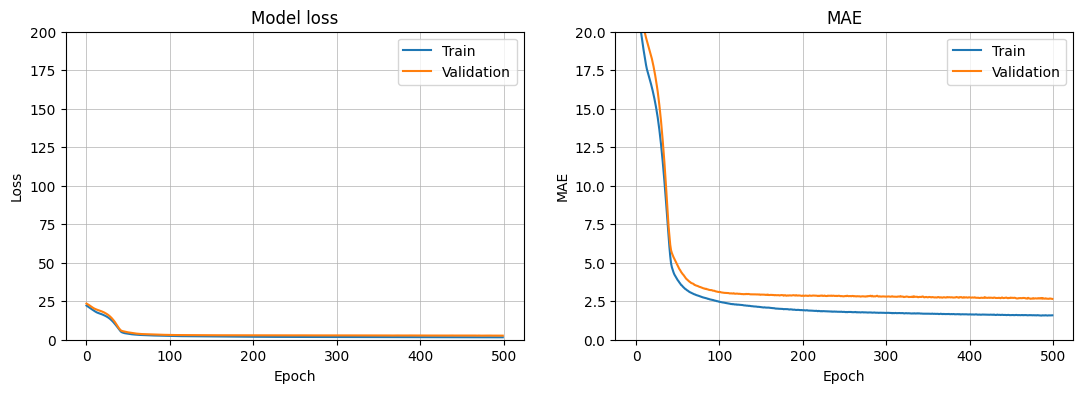

Epoch 1/500
17/17 [==============================] - 0s 4ms/step - loss: 21.2596 - mae: 21.2596 - val_loss: 22.6529 - val_mae: 22.6529
Epoch 2/500
17/17 [==============================] - 0s 1ms/step - loss: 20.9816 - mae: 20.9816 - val_loss: 22.3561 - val_mae: 22.3561
Epoch 3/500
17/17 [==============================] - 0s 1ms/step - loss: 20.6473 - mae: 20.6473 - val_loss: 21.9701 - val_mae: 21.9701
Epoch 4/500
17/17 [==============================] - 0s 1ms/step - loss: 20.2110 - mae: 20.2110 - val_loss: 21.4771 - val_mae: 21.4771
Epoch 5/500
17/17 [==============================] - 0s 1ms/step - loss: 19.6687 - mae: 19.6687 - val_loss: 20.8634 - val_mae: 20.8634
Epoch 6/500
17/17 [==============================] - 0s 1ms/step - loss: 18.9908 - mae: 18.9908 - val_loss: 20.0939 - val_mae: 20.0939
Epoch 7/500
17/17 [==============================] - 0s 1ms/step - loss: 18.1393 - mae: 18.1393 - val_loss: 19.1474 - val_mae: 19.1474
Epoch 8/500
17/17 [==============================] - 0s

Epoch 63/500
17/17 [==============================] - 0s 1ms/step - loss: 2.5226 - mae: 2.5226 - val_loss: 3.4857 - val_mae: 3.4857
Epoch 64/500
17/17 [==============================] - 0s 1ms/step - loss: 2.5076 - mae: 2.5076 - val_loss: 3.4759 - val_mae: 3.4759
Epoch 65/500
17/17 [==============================] - 0s 1ms/step - loss: 2.4889 - mae: 2.4889 - val_loss: 3.4697 - val_mae: 3.4697
Epoch 66/500
17/17 [==============================] - 0s 1ms/step - loss: 2.4820 - mae: 2.4820 - val_loss: 3.4335 - val_mae: 3.4335
Epoch 67/500
17/17 [==============================] - 0s 1ms/step - loss: 2.4599 - mae: 2.4599 - val_loss: 3.4197 - val_mae: 3.4197
Epoch 68/500
17/17 [==============================] - 0s 1ms/step - loss: 2.4609 - mae: 2.4609 - val_loss: 3.4071 - val_mae: 3.4071
Epoch 69/500
17/17 [==============================] - 0s 1ms/step - loss: 2.4386 - mae: 2.4386 - val_loss: 3.3839 - val_mae: 3.3839
Epoch 70/500
17/17 [==============================] - 0s 1ms/step - loss: 2.

Epoch 125/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9910 - mae: 1.9910 - val_loss: 2.9583 - val_mae: 2.9583
Epoch 126/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9777 - mae: 1.9777 - val_loss: 2.9867 - val_mae: 2.9867
Epoch 127/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9794 - mae: 1.9794 - val_loss: 2.9416 - val_mae: 2.9416
Epoch 128/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9653 - mae: 1.9653 - val_loss: 2.9615 - val_mae: 2.9615
Epoch 129/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9534 - mae: 1.9534 - val_loss: 2.9414 - val_mae: 2.9414
Epoch 130/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9651 - mae: 1.9651 - val_loss: 2.9279 - val_mae: 2.9279
Epoch 131/500
17/17 [==============================] - 0s 1ms/step - loss: 1.9399 - mae: 1.9399 - val_loss: 2.9325 - val_mae: 2.9325
Epoch 132/500
17/17 [==============================] - 0s 1ms/step - 

17/17 [==============================] - 0s 1ms/step - loss: 1.7213 - mae: 1.7213 - val_loss: 2.7760 - val_mae: 2.7760
Epoch 187/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7280 - mae: 1.7280 - val_loss: 2.7658 - val_mae: 2.7658
Epoch 188/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7054 - mae: 1.7054 - val_loss: 2.7682 - val_mae: 2.7682
Epoch 189/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7054 - mae: 1.7054 - val_loss: 2.7635 - val_mae: 2.7635
Epoch 190/500
17/17 [==============================] - 0s 1ms/step - loss: 1.7015 - mae: 1.7015 - val_loss: 2.7684 - val_mae: 2.7684
Epoch 191/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6971 - mae: 1.6971 - val_loss: 2.7707 - val_mae: 2.7707
Epoch 192/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6923 - mae: 1.6923 - val_loss: 2.7611 - val_mae: 2.7611
Epoch 193/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6871 -

Epoch 248/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6167 - mae: 1.6167 - val_loss: 2.7541 - val_mae: 2.7541
Epoch 249/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6201 - mae: 1.6201 - val_loss: 2.7444 - val_mae: 2.7444
Epoch 250/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6370 - mae: 1.6370 - val_loss: 2.7543 - val_mae: 2.7543
Epoch 251/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6146 - mae: 1.6146 - val_loss: 2.7408 - val_mae: 2.7408
Epoch 252/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6135 - mae: 1.6135 - val_loss: 2.7622 - val_mae: 2.7622
Epoch 253/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6189 - mae: 1.6189 - val_loss: 2.7314 - val_mae: 2.7314
Epoch 254/500
17/17 [==============================] - 0s 1ms/step - loss: 1.6092 - mae: 1.6092 - val_loss: 2.7306 - val_mae: 2.7306
Epoch 255/500
17/17 [==============================] - 0s 1ms/step - 

17/17 [==============================] - 0s 1ms/step - loss: 1.5558 - mae: 1.5558 - val_loss: 2.7238 - val_mae: 2.7238
Epoch 310/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5572 - mae: 1.5572 - val_loss: 2.7300 - val_mae: 2.7300
Epoch 311/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5603 - mae: 1.5603 - val_loss: 2.7226 - val_mae: 2.7226
Epoch 312/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5516 - mae: 1.5516 - val_loss: 2.7257 - val_mae: 2.7257
Epoch 313/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5505 - mae: 1.5505 - val_loss: 2.7195 - val_mae: 2.7195
Epoch 314/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5521 - mae: 1.5521 - val_loss: 2.7314 - val_mae: 2.7314
Epoch 315/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5580 - mae: 1.5580 - val_loss: 2.7246 - val_mae: 2.7246
Epoch 316/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5496 -

Epoch 371/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5508 - mae: 1.5508 - val_loss: 2.7400 - val_mae: 2.7400
Epoch 372/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5131 - mae: 1.5131 - val_loss: 2.7297 - val_mae: 2.7297
Epoch 373/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5105 - mae: 1.5105 - val_loss: 2.7520 - val_mae: 2.7520
Epoch 374/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5029 - mae: 1.5029 - val_loss: 2.7429 - val_mae: 2.7429
Epoch 375/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5294 - mae: 1.5294 - val_loss: 2.7512 - val_mae: 2.7512
Epoch 376/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5145 - mae: 1.5145 - val_loss: 2.7566 - val_mae: 2.7566
Epoch 377/500
17/17 [==============================] - 0s 1ms/step - loss: 1.5019 - mae: 1.5019 - val_loss: 2.7337 - val_mae: 2.7337
Epoch 378/500
17/17 [==============================] - 0s 1ms/step - 

17/17 [==============================] - 0s 1ms/step - loss: 1.4729 - mae: 1.4729 - val_loss: 2.7475 - val_mae: 2.7475
Epoch 433/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4592 - mae: 1.4592 - val_loss: 2.7365 - val_mae: 2.7365
Epoch 434/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4903 - mae: 1.4903 - val_loss: 2.7468 - val_mae: 2.7468
Epoch 435/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4653 - mae: 1.4653 - val_loss: 2.7505 - val_mae: 2.7505
Epoch 436/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4619 - mae: 1.4619 - val_loss: 2.7594 - val_mae: 2.7594
Epoch 437/500
17/17 [==============================] - 0s 986us/step - loss: 1.4549 - mae: 1.4549 - val_loss: 2.7551 - val_mae: 2.7551
Epoch 438/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4614 - mae: 1.4614 - val_loss: 2.7597 - val_mae: 2.7597
Epoch 439/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4652

Epoch 494/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4354 - mae: 1.4354 - val_loss: 2.7608 - val_mae: 2.7608
Epoch 495/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4330 - mae: 1.4330 - val_loss: 2.7660 - val_mae: 2.7660
Epoch 496/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4264 - mae: 1.4264 - val_loss: 2.7469 - val_mae: 2.7469
Epoch 497/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4365 - mae: 1.4365 - val_loss: 2.7694 - val_mae: 2.7694
Epoch 498/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4321 - mae: 1.4321 - val_loss: 2.7434 - val_mae: 2.7434
Epoch 499/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4285 - mae: 1.4285 - val_loss: 2.7608 - val_mae: 2.7608
Epoch 500/500
17/17 [==============================] - 0s 1ms/step - loss: 1.4494 - mae: 1.4494 - val_loss: 2.7383 - val_mae: 2.7383


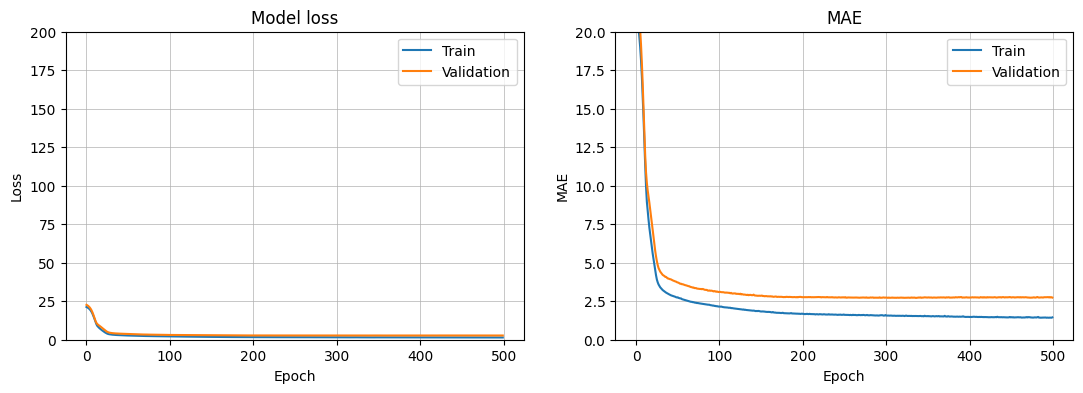

Epoch 1/500
17/17 [==============================] - 0s 4ms/step - loss: 21.8170 - mae: 21.8170 - val_loss: 23.2950 - val_mae: 23.2950
Epoch 2/500
17/17 [==============================] - 0s 997us/step - loss: 21.7590 - mae: 21.7590 - val_loss: 23.2499 - val_mae: 23.2499
Epoch 3/500
17/17 [==============================] - 0s 1ms/step - loss: 21.7178 - mae: 21.7178 - val_loss: 23.2132 - val_mae: 23.2132
Epoch 4/500
17/17 [==============================] - 0s 1ms/step - loss: 21.6832 - mae: 21.6832 - val_loss: 23.1816 - val_mae: 23.1816
Epoch 5/500
17/17 [==============================] - 0s 1ms/step - loss: 21.6527 - mae: 21.6527 - val_loss: 23.1532 - val_mae: 23.1532
Epoch 6/500
17/17 [==============================] - 0s 1ms/step - loss: 21.6248 - mae: 21.6248 - val_loss: 23.1271 - val_mae: 23.1271
Epoch 7/500
17/17 [==============================] - 0s 1ms/step - loss: 21.5990 - mae: 21.5990 - val_loss: 23.1028 - val_mae: 23.1028
Epoch 8/500
17/17 [==============================] - 

Epoch 61/500
17/17 [==============================] - 0s 1ms/step - loss: 20.8029 - mae: 20.8029 - val_loss: 22.3216 - val_mae: 22.3216
Epoch 62/500
17/17 [==============================] - 0s 988us/step - loss: 20.7909 - mae: 20.7909 - val_loss: 22.3095 - val_mae: 22.3095
Epoch 63/500
17/17 [==============================] - 0s 999us/step - loss: 20.7790 - mae: 20.7790 - val_loss: 22.2973 - val_mae: 22.2973
Epoch 64/500
17/17 [==============================] - 0s 958us/step - loss: 20.7670 - mae: 20.7670 - val_loss: 22.2852 - val_mae: 22.2852
Epoch 65/500
17/17 [==============================] - 0s 1ms/step - loss: 20.7551 - mae: 20.7551 - val_loss: 22.2730 - val_mae: 22.2730
Epoch 66/500
17/17 [==============================] - 0s 972us/step - loss: 20.7432 - mae: 20.7432 - val_loss: 22.2608 - val_mae: 22.2608
Epoch 67/500
17/17 [==============================] - 0s 1ms/step - loss: 20.7314 - mae: 20.7314 - val_loss: 22.2487 - val_mae: 22.2487
Epoch 68/500
17/17 [====================

17/17 [==============================] - 0s 1ms/step - loss: 20.1059 - mae: 20.1059 - val_loss: 21.6113 - val_mae: 21.6113
Epoch 121/500
17/17 [==============================] - 0s 1ms/step - loss: 20.0937 - mae: 20.0937 - val_loss: 21.5989 - val_mae: 21.5989
Epoch 122/500
17/17 [==============================] - 0s 1ms/step - loss: 20.0814 - mae: 20.0814 - val_loss: 21.5867 - val_mae: 21.5867
Epoch 123/500
17/17 [==============================] - 0s 1ms/step - loss: 20.0692 - mae: 20.0692 - val_loss: 21.5744 - val_mae: 21.5744
Epoch 124/500
17/17 [==============================] - 0s 979us/step - loss: 20.0570 - mae: 20.0570 - val_loss: 21.5621 - val_mae: 21.5621
Epoch 125/500
17/17 [==============================] - 0s 977us/step - loss: 20.0447 - mae: 20.0447 - val_loss: 21.5498 - val_mae: 21.5498
Epoch 126/500
17/17 [==============================] - 0s 1ms/step - loss: 20.0325 - mae: 20.0325 - val_loss: 21.5376 - val_mae: 21.5376
Epoch 127/500
17/17 [==============================

17/17 [==============================] - 0s 1ms/step - loss: 19.3936 - mae: 19.3936 - val_loss: 20.8909 - val_mae: 20.8909
Epoch 180/500
17/17 [==============================] - 0s 1ms/step - loss: 19.3816 - mae: 19.3816 - val_loss: 20.8786 - val_mae: 20.8786
Epoch 181/500
17/17 [==============================] - 0s 998us/step - loss: 19.3696 - mae: 19.3696 - val_loss: 20.8664 - val_mae: 20.8664
Epoch 182/500
17/17 [==============================] - 0s 1ms/step - loss: 19.3576 - mae: 19.3576 - val_loss: 20.8541 - val_mae: 20.8541
Epoch 183/500
17/17 [==============================] - 0s 992us/step - loss: 19.3456 - mae: 19.3456 - val_loss: 20.8419 - val_mae: 20.8419
Epoch 184/500
17/17 [==============================] - 0s 978us/step - loss: 19.3335 - mae: 19.3335 - val_loss: 20.8296 - val_mae: 20.8296
Epoch 185/500
17/17 [==============================] - 0s 1ms/step - loss: 19.3215 - mae: 19.3215 - val_loss: 20.8173 - val_mae: 20.8173
Epoch 186/500
17/17 [============================

17/17 [==============================] - 0s 998us/step - loss: 18.6810 - mae: 18.6810 - val_loss: 20.1554 - val_mae: 20.1554
Epoch 239/500
17/17 [==============================] - 0s 1ms/step - loss: 18.6689 - mae: 18.6689 - val_loss: 20.1431 - val_mae: 20.1431
Epoch 240/500
17/17 [==============================] - 0s 1ms/step - loss: 18.6567 - mae: 18.6567 - val_loss: 20.1308 - val_mae: 20.1308
Epoch 241/500
17/17 [==============================] - 0s 1ms/step - loss: 18.6446 - mae: 18.6446 - val_loss: 20.1185 - val_mae: 20.1185
Epoch 242/500
17/17 [==============================] - 0s 996us/step - loss: 18.6324 - mae: 18.6324 - val_loss: 20.1062 - val_mae: 20.1062
Epoch 243/500
17/17 [==============================] - 0s 962us/step - loss: 18.6201 - mae: 18.6201 - val_loss: 20.0939 - val_mae: 20.0939
Epoch 244/500
17/17 [==============================] - 0s 1ms/step - loss: 18.6080 - mae: 18.6080 - val_loss: 20.0815 - val_mae: 20.0815
Epoch 245/500
17/17 [============================

17/17 [==============================] - 0s 994us/step - loss: 17.9716 - mae: 17.9716 - val_loss: 19.4228 - val_mae: 19.4228
Epoch 298/500
17/17 [==============================] - 0s 1ms/step - loss: 17.9595 - mae: 17.9595 - val_loss: 19.4101 - val_mae: 19.4101
Epoch 299/500
17/17 [==============================] - 0s 989us/step - loss: 17.9473 - mae: 17.9473 - val_loss: 19.3973 - val_mae: 19.3973
Epoch 300/500
17/17 [==============================] - 0s 1ms/step - loss: 17.9352 - mae: 17.9352 - val_loss: 19.3846 - val_mae: 19.3846
Epoch 301/500
17/17 [==============================] - 0s 2ms/step - loss: 17.9230 - mae: 17.9230 - val_loss: 19.3718 - val_mae: 19.3718
Epoch 302/500
17/17 [==============================] - 0s 1ms/step - loss: 17.9108 - mae: 17.9108 - val_loss: 19.3590 - val_mae: 19.3590
Epoch 303/500
17/17 [==============================] - 0s 1ms/step - loss: 17.8986 - mae: 17.8986 - val_loss: 19.3463 - val_mae: 19.3463
Epoch 304/500
17/17 [==============================

17/17 [==============================] - 0s 1ms/step - loss: 17.2319 - mae: 17.2319 - val_loss: 18.6468 - val_mae: 18.6468
Epoch 357/500
17/17 [==============================] - 0s 986us/step - loss: 17.2190 - mae: 17.2190 - val_loss: 18.6331 - val_mae: 18.6331
Epoch 358/500
17/17 [==============================] - 0s 985us/step - loss: 17.2060 - mae: 17.2060 - val_loss: 18.6194 - val_mae: 18.6194
Epoch 359/500
17/17 [==============================] - 0s 1ms/step - loss: 17.1930 - mae: 17.1930 - val_loss: 18.6057 - val_mae: 18.6057
Epoch 360/500
17/17 [==============================] - 0s 997us/step - loss: 17.1799 - mae: 17.1799 - val_loss: 18.5919 - val_mae: 18.5919
Epoch 361/500
17/17 [==============================] - 0s 1ms/step - loss: 17.1669 - mae: 17.1669 - val_loss: 18.5781 - val_mae: 18.5781
Epoch 362/500
17/17 [==============================] - 0s 953us/step - loss: 17.1538 - mae: 17.1538 - val_loss: 18.5643 - val_mae: 18.5643
Epoch 363/500
17/17 [==========================

17/17 [==============================] - 0s 1ms/step - loss: 16.4548 - mae: 16.4548 - val_loss: 17.8383 - val_mae: 17.8383
Epoch 416/500
17/17 [==============================] - 0s 1ms/step - loss: 16.4415 - mae: 16.4415 - val_loss: 17.8248 - val_mae: 17.8248
Epoch 417/500
17/17 [==============================] - 0s 997us/step - loss: 16.4281 - mae: 16.4281 - val_loss: 17.8113 - val_mae: 17.8113
Epoch 418/500
17/17 [==============================] - 0s 961us/step - loss: 16.4148 - mae: 16.4148 - val_loss: 17.7977 - val_mae: 17.7977
Epoch 419/500
17/17 [==============================] - 0s 981us/step - loss: 16.4014 - mae: 16.4014 - val_loss: 17.7842 - val_mae: 17.7842
Epoch 420/500
17/17 [==============================] - 0s 983us/step - loss: 16.3881 - mae: 16.3881 - val_loss: 17.7706 - val_mae: 17.7706
Epoch 421/500
17/17 [==============================] - 0s 995us/step - loss: 16.3747 - mae: 16.3747 - val_loss: 17.7570 - val_mae: 17.7570
Epoch 422/500
17/17 [========================

17/17 [==============================] - 0s 993us/step - loss: 15.6953 - mae: 15.6953 - val_loss: 17.0508 - val_mae: 17.0508
Epoch 475/500
17/17 [==============================] - 0s 1ms/step - loss: 15.6826 - mae: 15.6826 - val_loss: 17.0379 - val_mae: 17.0379
Epoch 476/500
17/17 [==============================] - 0s 1ms/step - loss: 15.6699 - mae: 15.6699 - val_loss: 17.0250 - val_mae: 17.0250
Epoch 477/500
17/17 [==============================] - 0s 1ms/step - loss: 15.6570 - mae: 15.6570 - val_loss: 17.0121 - val_mae: 17.0121
Epoch 478/500
17/17 [==============================] - 0s 993us/step - loss: 15.6443 - mae: 15.6443 - val_loss: 16.9991 - val_mae: 16.9991
Epoch 479/500
17/17 [==============================] - 0s 1ms/step - loss: 15.6315 - mae: 15.6315 - val_loss: 16.9862 - val_mae: 16.9862
Epoch 480/500
17/17 [==============================] - 0s 1ms/step - loss: 15.6188 - mae: 15.6188 - val_loss: 16.9733 - val_mae: 16.9733
Epoch 481/500
17/17 [==============================

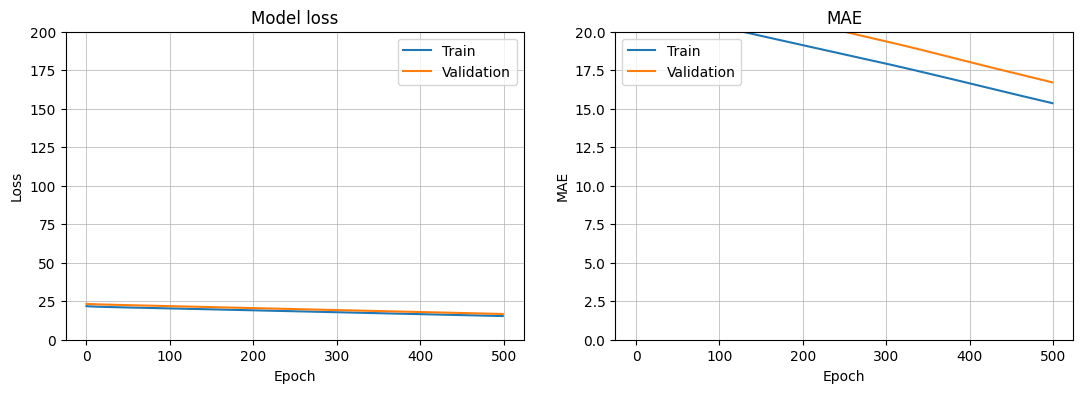

In [74]:
model_names=['rmsprop', 'adam', 'adagrad']
results=[]
for name in model_names:
    model = initialize_model()
    model = compile_model(model,name)
    history=model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.33,batch_size=16)
    plot_loss_mae(history)
    results.append(np.mean(history.__dict__['history']['mae']))

#### Neural Network vs. Baseline - Part 2

Are your predictions better than those of the baseline model you evaluated at the beginning of the notebook?

In [75]:
# MAE on the testing set for different optimizers
for optimizer, result in zip(['rmsprop', 'adam', 'adagrad'], results):
    print(f"The MAE on the test set with the {optimizer} optimizer is equal to {result:.2f}")

# MAE on the testing set for the baseline model    
print("-"*5)    
print(f"The MAE on the test set with the baseline model is equal to {mae_test_baseline:.2f}")

The MAE on the test set with the rmsprop optimizer is equal to 3.09
The MAE on the test set with the adam optimizer is equal to 2.29
The MAE on the test set with the adagrad optimizer is equal to 18.50
-----
The MAE on the test set with the baseline model is equal to 6.65


#### 💡Answer

<details>
    <summary>Click me</summary>

You can see that the Neural Network beat the baseline when using either `adam` or `rmsprop` as an optimizer but the result was significantly worse with the `adagrad` optimizer.

**👇 The advice from the Deep Learning community is the following 👇:**

🔥 So far, our best-performing optimizer is `adam`. Maybe a mathematician specialized in numerical methods will find a better solver in the future but for the moment, Adam is your best friend and they have already been helping us achieve remarkable results.
</details>

#### Next Steps for this Challenge

👩‍🎓 Do you remember the **Machine Learning > 04.Under The Hood** unit where we coded our **Gradient Descent** by choosing a specific `learning_rate`? It represents how slow/fast your algorithm learns. In other words, it controls the intensity of the change of the weights at each optimization of the NN, at each backpropagation!

🚀 Well, the **solvers** in Machine Learning and the **optimizers** in Deep Learning are advanced iterative methods relying on **hyperparameters**, and the `learning_rate` is one of them!

🤔 How can I control this `learning_rate`?

✅ Instead of calling an optimizer with a string ("adam", "rmsprop", etc.), which uses a default value for the Learning Rate, we will call 📚 [`tf.keras.optimizers`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) objects 📚 and tailor them to our needs.

🧑🏻‍🏫 Different Learning Rates have different consequences, as shown here: 

<img src="https://wagon-public-datasets.s3-eu-west-1.amazonaws.com/06-DL/02-Optimizer-loss-and-fitting/learning_rate.png" alt="Learning rate" height=300>

### (2.2) The Influence of the Learning Rate

### Selecting an Optimizer with a Custom Learning Rate

📚 [`tf.keras.optimizers.Adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Instead of initializing the optimizer with a string, let's initialize an optimizer manually.

- Instantiate an Adam optimizer with a Learning Rate of $ \alpha = 0.1$
    - Keep the other parameters at their default values
- Use this optimizer in the `compile_model` function
- Train/fit the model
- Plot the history
- Evaluate your model

4/4 [==============================] - 0s 492us/step - loss: 3.0071 - mae: 3.0071
Mean absolute error with a learning rate of 0.1: 3.0071


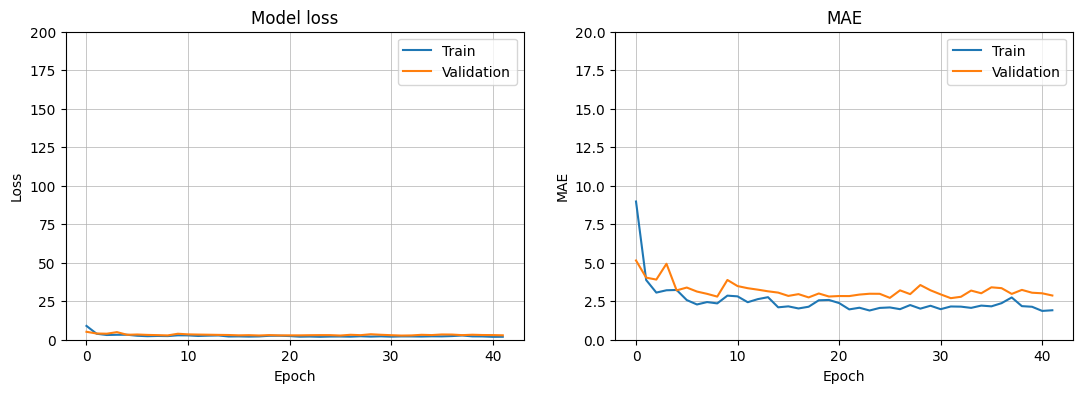

CPU times: user 1.26 s, sys: 160 ms, total: 1.42 s
Wall time: 1.04 s


In [76]:
%%time

# 1. Instantiating the Adam optimizer with a learning rate alpha = 0.1
adam = Adam(learning_rate = 0.1)

# 2. Initializing the model
model = initialize_model()

# 3. Compiling the model with the custom Adam optimizer
model = compile_model(model, adam)

# 4. Training the neural net
es = EarlyStopping(patience = 10)
history = model.fit(
    X_train_scaled,
    y_train, 
    validation_split = 0.3,
    shuffle = True,
    batch_size=16, 
    epochs = 1_000,
    callbacks = [es],
    verbose = 0
)

# 5. Plot the history and evaluate the model
res = model.evaluate(X_test_scaled, y_test)[1]
res
print(f'Mean absolute error with a learning rate of 0.1: {res:.4f}')
plot_loss_mae(history)

### ❓Playing with Learning Rates

Now, reproduce the same plots and results but for different Learning Rates.

<details>
    <summary>Remark</summary>

There is a chance that the y-axis is too large for you to visualize some results with some Learning Rates. In that case, feel free to re-write the plot function to plot only the epochs $> 10$.

</details>

4/4 [==============================] - 0s 501us/step - loss: 3.4490 - mae: 3.4490
Mean absolute error with a learning rate of 0.0001: 3.4490


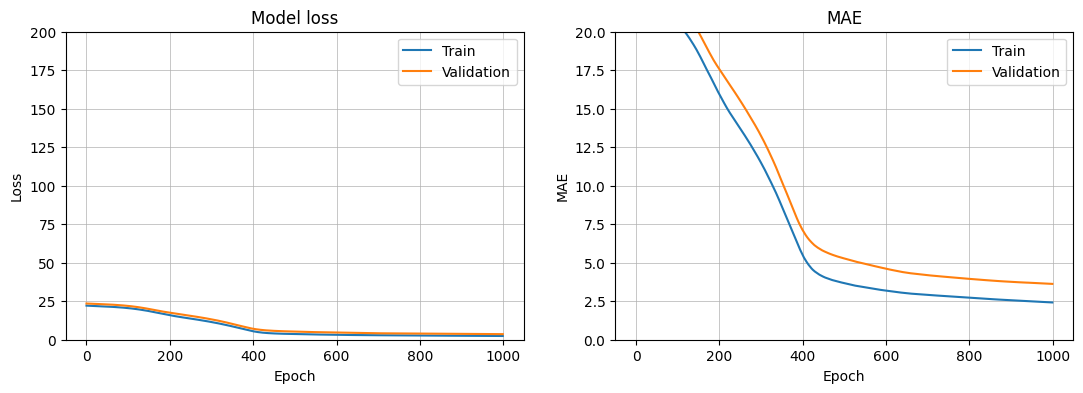

4/4 [==============================] - 0s 505us/step - loss: 2.9229 - mae: 2.9229
Mean absolute error with a learning rate of 0.001: 2.9229


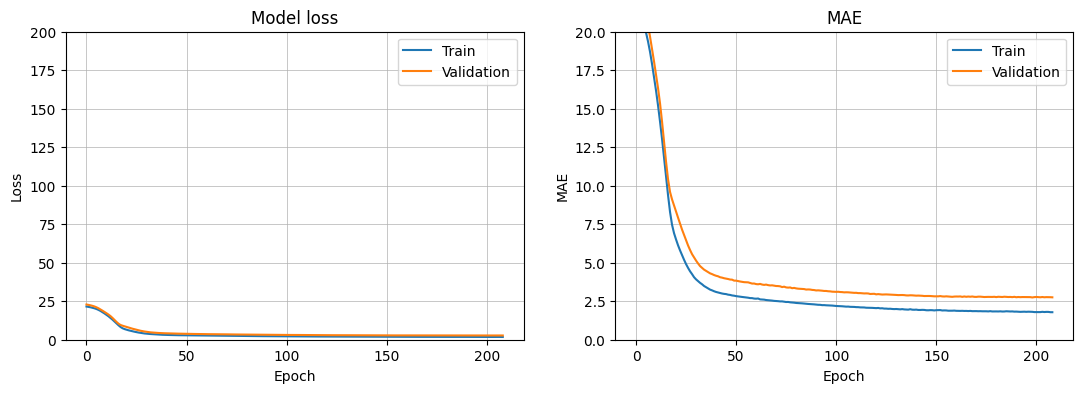

4/4 [==============================] - 0s 493us/step - loss: 3.0089 - mae: 3.0089
Mean absolute error with a learning rate of 0.01: 3.0089


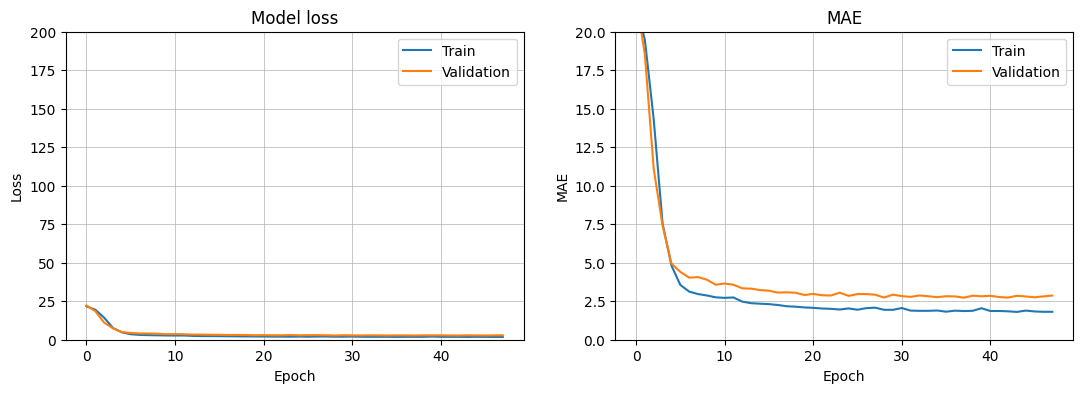

4/4 [==============================] - 0s 504us/step - loss: 2.7643 - mae: 2.7643
Mean absolute error with a learning rate of 0.1: 2.7643


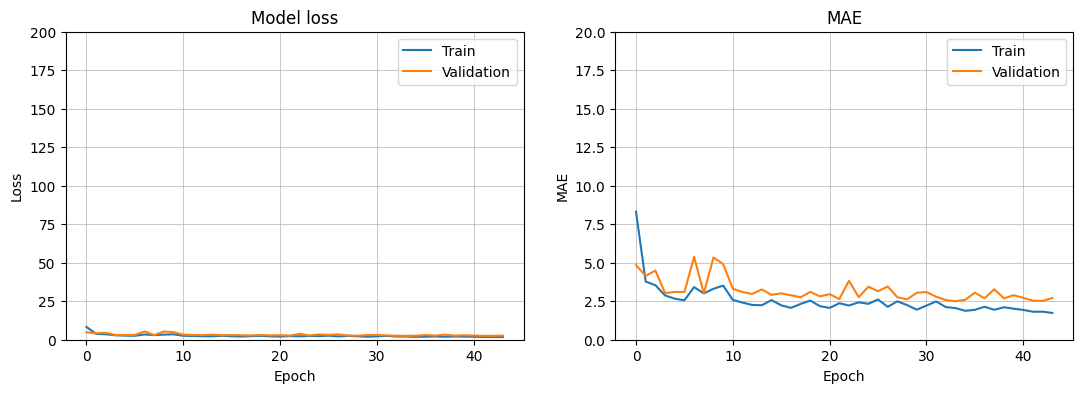

4/4 [==============================] - 0s 455us/step - loss: 6.5926 - mae: 6.5926
Mean absolute error with a learning rate of 1: 6.5926


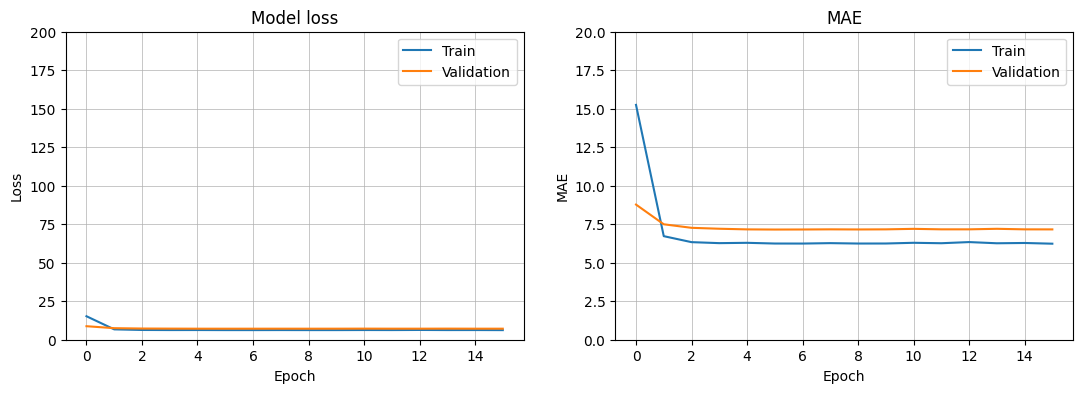

4/4 [==============================] - 0s 498us/step - loss: 6.6405 - mae: 6.6405
Mean absolute error with a learning rate of 2: 6.6405


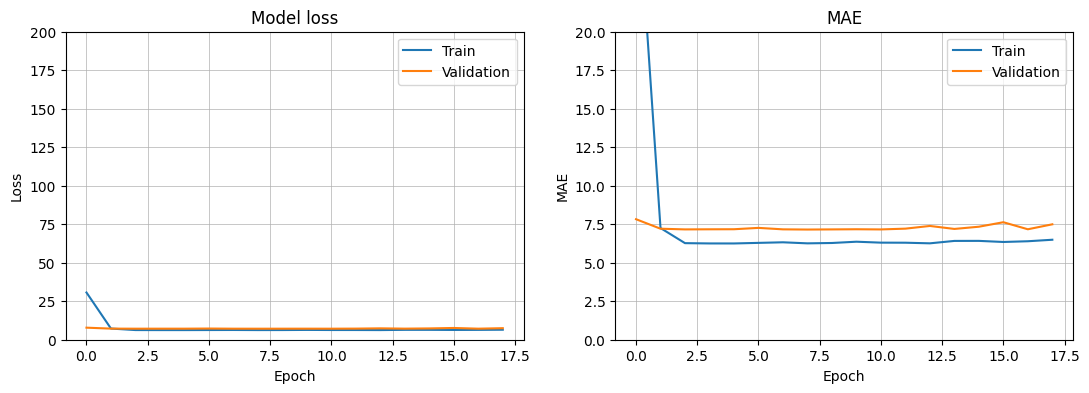

In [80]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 2]
results = []

for learning_rate in learning_rates:
    # 1. Instantiating the Adam optimizer with a learning rate alpha = 0.1
    adam = Adam(learning_rate = learning_rate)

    # 2. Initializing the model
    model = initialize_model()

    # 3. Compiling the model with the custom Adam optimizer
    model = compile_model(model, adam)

    # 4. Training the neural net
    es = EarlyStopping(patience = 10)
    history = model.fit(
        X_train_scaled,
        y_train, 
        validation_split = 0.3,
        shuffle = True,
        batch_size=16, 
        epochs = 1_000,
        callbacks = [es],
        verbose = 0
        )
    res = model.evaluate(X_test_scaled, y_test)[1]
    print(f'Mean absolute error with a learning rate of {learning_rate}: {res:.4f}')
    plot_loss_mae(history)

## (3) The Loss

---

❗️It's important to clearly understand the **difference between losses and metrics**❗️

- 🏋🏻‍♀️ The **Loss Functions** are computed **during the training procedure**
    - For regression tasks, the classic Loss Functions are **(Root) Mean Squared Error** ((R)MSE), **Mean Absolute Error** (MAE), and **Mean Squared Logarithmic Error** (MSLE, as seen in the Kaggle challenge)
    - For classification tasks, the classic Loss Functions are **Binary Crossentropy** (also known as LogLoss), **Categorical Crossentropy**, Hinge Loss, etc.
- 🧑🏻‍🏫 The **metrics** are computed to evaluate your models, **after training them**!
    - For regression tasks, common metrics are MSE, MAE, RMSE, Coefficient of Determination (R2), etc.
    - For classification tasks, common metrics are Accuracy, Recall, Precision, and F1-Score
- 👀 Notice that some metrics can also be used as Loss Functions, as long as they are differentiable! (e.g. the **MSE**)

If these notions are not clear, we strongly advise reviewing **Machine Learning > 03.Performance Metrics** and **Machine Learning > 05.Model Tuning**

---

⏩ Alright, after this reminder, let's move on:

### ❓Optimizing a Model with a certain Loss Function

- Run the same NN, once with `mae` as the loss, and once with `mse`
- In both cases, compare `mae_train`, `mae_val`, `mse_train`, `mse_val`

In [83]:
# YOUR CODE HERE
def compile_model_spec(model, optimizer_name,loss):
    model.compile(optimizer=optimizer_name,loss=loss,metrics=loss)
    return model
adam = Adam(learning_rate = 0.1)
results={}
for loss1 in ['mae','mse']:
    model = initialize_model()
    model = compile_model_spec(model,adam,loss)
    es = EarlyStopping(patience = 10)
    history = model.fit(
        X_train_scaled,
        y_train, 
        validation_split = 0.3,
        shuffle = True,
        batch_size=16, 
        epochs = 1_000,
        callbacks = [es],
        verbose = 0
        )
    res = model.evaluate(X_test_scaled, y_test)[1]
    results[loss1]=res

4/4 [==============================] - 0s 533us/step - loss: 3.0328 - mae: 3.0328


In [84]:
results

{'mae': 3.143003225326538, 'mse': 3.0328166484832764}

### 💡Learnings

🤔 When you work on this regression task, you want to achieve the lowest MAE in the testing set at the end, right? So why wouldn't we use it directly as a Loss Function that would decrease with the number of epochs? 

<details>
    <summary>Answer</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.

One thing is sure: in Deep Learning, you will never really reach the "global minimum" of the true Loss Function (the one computed using your entire training set as one single batch). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the Loss Function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameters are best suited to the MSE than to the MAE loss?

</details>

## (4)  Saving and Loading a Trained Neural Network

🤯 Imagine that you trained a complex Neural Network (many layers/neurons) on a huge dataset. The parameters of your Deep Learning Model (weights and biases) are now optimized and you would like to share these weights with a teammate who wants to predict a new data point. Would you give this person your notebook for them to run it and then predict the new data point? Hell no, we have a much better solution:
- 💾 Save the weights of the optimized Neural Network
- 🤝 Your friend/colleague/teammate/classmate can use them to predict a new data point

### ❓Training a Good Model

- Try to reach an MAE on the testing set that is lower than 5 (_feel free to re-create the architecture and redefine your compiling parameters in this section!_)
    - Remember: we are predicting house prices, so a mistake of less than 5.000 USD is already good in the real estate industry)

- Whether you managed to reach it or not, move on to the "Saving a Model" section after a few attempts.

In [101]:
def initialize_model_2():
    model = models.Sequential()
    
    model.add(layers.Dense(10,activation='relu',input_dim=X_train_scaled.shape[1]))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(7,activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1,activation='linear'))

    
    return model

In [117]:
# YOUR CODE HERE
es=EarlyStopping(patience=10)
model = initialize_model()
adam = Adam(learning_rate=0.1)
model = compile_model(model,adam)

history=model.fit(X_train_scaled,y_train,epochs=1000,
                  shuffle=True,validation_split=0.3,
                  verbose=0,batch_size=16,callbacks=[es])

In [118]:
mae_test=np.mean(history.__dict__['history']['mae'])

In [119]:
mae_test

3.1303139090538026

In [120]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'solution',
    mae_test = mae_test
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/gasparburgi/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/gasparburgi/code/GasparinB/06-Deep-Learning/02-Optimizer-loss-and-fitting/data-finetune-your-neural-network/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_solution.py::TestSolution::test_is_score_beat_baseline PASSED       [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/solution.pickle

git commit -m 'Completed solution step'

git push origin master



In [121]:
!git add tests/solution.pickle

!git commit -m 'Completed solution step'

!git push origin master

[master 911352c] Completed solution step
 1 file changed, 0 insertions(+), 0 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 427 bytes | 427.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:GasparinB/data-finetune-your-neural-network.git
   36f0b42..911352c  master -> master


### ❓Saving a Model

📚 [`tf.keras.models.save_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)

Save your model using the `.save_model(model, 'name_of_my_model')` method.

In [122]:
from tensorflow.keras.models import save_model

In [123]:
# YOUR CODE HERE
save_model(model,'adam_0.1_model')

INFO:tensorflow:Assets written to: adam_0.1_model/assets


### ❓Loading a Model

📚 [`tf.keras.models.load_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model)

- Load the model that you've just saved using `.load_model('name_of_your_model')` and store it into a variable called `loaded_model`
- Evaluate it on the testing data to check that it gives the same result as before

In [124]:
from tensorflow.keras.models import load_model

In [126]:
# YOUR CODE HERE
model = load_model('adam_0.1_model/')

In [127]:
# YOUR CODE HERE
model.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 0s 639us/step - loss: 2.9029 - mae: 2.9029


[2.9029293060302734, 2.9029293060302734]

## (5) (Optional) Exponential Decay

❗️Warning❗️ 

- This section is optional and for advanced practitioners
- The next question is not essential and can be indeed skipped as many algorithms can be run without such optimization

🧑🏻‍🏫 Instead of keeping a fixed Learning Rate, you can change it from one iteration to the other, with the intuition that at first, you need a large Learning Rate to learn fast, and as the Neural Network converges and gets closer to the minimum of the Loss Function, you can decrease the value of the Learning Rate. This is called a **scheduler**. 

### ❓The Exponential Decay Scheduler

Use the 📚 [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) 📚 in the `adam` optimizer, and run it on the previous data.

Start with the following:

```python
initial_learning_rate = 0.001 # start with default Adam value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps = 5000, decay_rate = 0.7,
)
```

In [ ]:
X_train.shape[0] * 0.7 / 16

In [ ]:
# YOUR CODE HERE

## 🏁 Congratulations!

💾 Do not forget to `git add/commit/push` your notebook...

🚀 ... and move to the next challenge!

---

**Further reading after your bootcamp:**

The **Boston Housing Dataset** was deprecated by Scikit-Learn for ethical reasons, and TensorFlow may also replace it in the future.

A certain M. Carlisle wrote a 12-min read article called ["Racist Data Destruction"](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8) to investigate this problem.